In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df = pd.read_csv("/Users/sujitharajan/Documents/GitHub/IS460/data/df_prepared.csv")


In [45]:
df.drop(columns=df.columns[0], axis = 1, inplace =True)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295689 entries, 0 to 295688
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source_city       295689 non-null  float64
 1   departure_time    295689 non-null  float64
 2   stops             295689 non-null  float64
 3   arrival_time      295689 non-null  float64
 4   destination_city  295689 non-null  float64
 5   class             295689 non-null  float64
 6   days_left_binned  295689 non-null  float64
 7   duration_sqrt     295689 non-null  float64
 8   price             295689 non-null  float64
dtypes: float64(9)
memory usage: 20.3 MB


In [50]:
X = df.drop('price', axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [51]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 935909504.0000
Epoch 2/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 919116672.0000
Epoch 3/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 905726464.0000
Epoch 4/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 893097472.0000
Epoch 5/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 876246464.0000
Epoch 6/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 861970048.0000
Epoch 7/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 850415168.0000
Epoch 8/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 838173888.0000
Epoch 9/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 820169600.0000
Epoch 10/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 813659904.0000
Epoch 11/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 796493248.0000
Epoch 12/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 784197888.0000
Epoch 13/100
7393/7393 ━━━━━━━━━━━━━━━━━━━━ 39s 5

In [53]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price

1849/1849 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[27249.182 ],
       [ 4998.4062],
       [ 5143.036 ],
       ...,
       [ 9287.97  ],
       [ 5272.0684],
       [27249.166 ]], dtype=float32)

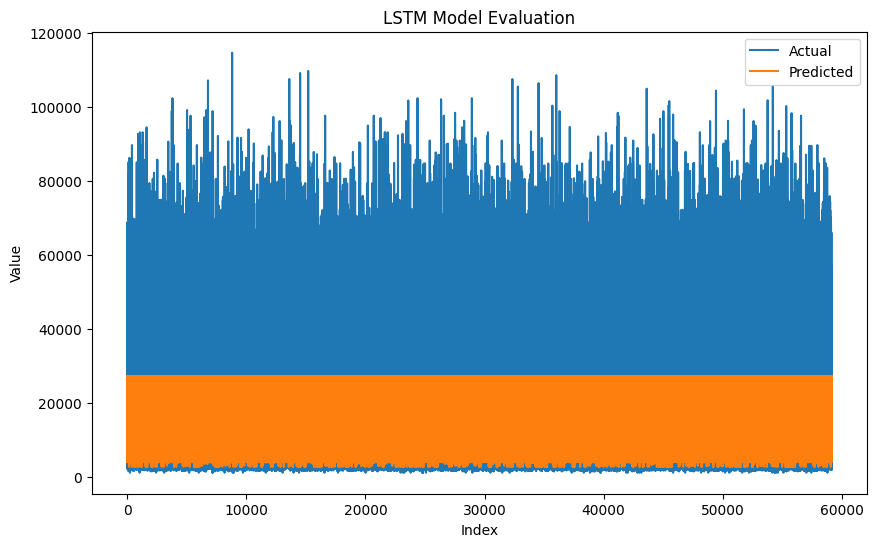

In [56]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_price, label='Predicted')
plt.xlabel('Index')  # Use index as the x-axis label
plt.ylabel('Value')
plt.title('LSTM Model Evaluation')
plt.legend()
plt.show()

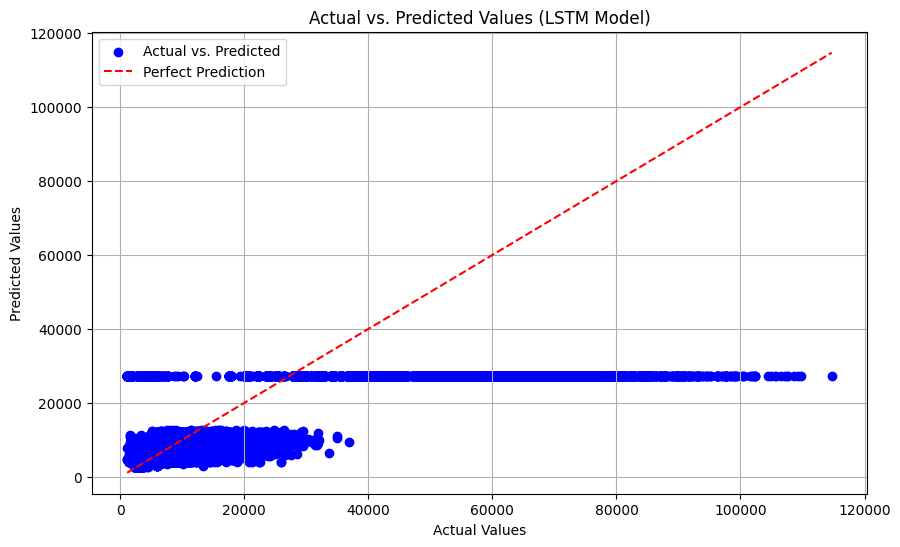

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_price, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (LSTM Model)')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
mse = mean_squared_error(y_test, predicted_price)
r2 = r2_score(y_test, predicted_price)
mape = mean_absolute_percentage_error(y_test, predicted_price)
n = len(y_test) 
p = X_test.shape[1] 
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse = np.sqrt(mse)


In [59]:
lstm_results = pd.DataFrame(['LSTM', mse, r2, mape, adjusted_r2, rmse ]).transpose()
lstm_results.columns = ['Method', 'MSE', 'R2', 'MAPE','Adjusted R2', 'RMSE']
lstm_results

,Method,MSE,R2,MAPE,Adjusted R2,RMSE
0,LSTM,260966234.915011,0.494297,0.463181,0.494229,16154.449384
